# Task_windowing

## Task description

Generate three sine signals of given $f_1$, $f_2$, and $f_3$ and amplitude $|x[k]|_\text{max}$ for the sampling frequency $f_s$ in the range of $0\leq k < N$.

Plot:
1. the "normalized" level of the DFT spectra.
2. the window DTFT spectra normalized to their mainlobe maximum.

The intervals for $f$, $\Omega$, and amplitudes should be chosen by yourself for the best interpretation purposes.

Interpret the results of the figures obtained regarding the best and worst case for the different windows. Why do the results for the signals with frequencies $f_1$ and $f_2$ differ?

Variant 6.:

| No | $f_1$ | $f_2$ | $f_3$ | $\|x[k]\|_\text{max}$ | $f_s$ | $N$ |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 6 | 600 | 600.25 | 599.75 | 3 | 800 | 2000 |

## Python code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop


In [2]:
# Parameters for Variant 6
f1 = 600      # Hz
f2 = 600.25   # Hz
f3 = 599.75   # Hz
amplitude = 3 # Amplitude
fs = 800      # Sampling frequency (Hz)
N = 2000      # Number of samples


In [16]:
# Generate time index and signals
k = np.arange(N)
x1 = amplitude * np.sin(2 * np.pi * f1 / fs * k)
x2 = amplitude * np.sin(2 * np.pi * f2 / fs * k)
x3 = amplitude * np.sin(2 * np.pi * f3 / fs * k)


In [17]:
# Generate window functions
w_rect = np.ones(N)
w_hann = hann(N, sym=False)
w_flattop = flattop(N, sym=False)


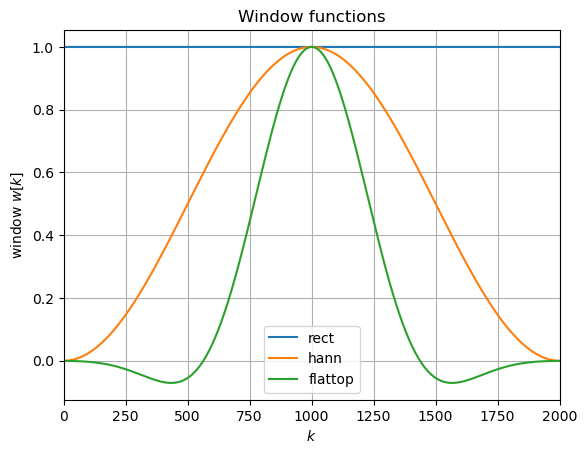

In [ ]:
# Plot window functions
plt.plot(w_rect, 'C0-', ms=3, label='rect')
plt.plot(w_hann, 'C1-', ms=3, label='hann')
plt.plot(w_flattop, 'C2-', ms=3, label='flattop')
plt.xlabel(r'$k$')
plt.ylabel(r'window $w[k]$')
plt.xlim(0, N)
plt.legend()
plt.grid(True)
plt.title('Window functions')
plt.show()


In [18]:
# Apply windows to signals
x1_rect = x1 * w_rect
x1_hann = x1 * w_hann
x1_flattop = x1 * w_flattop

x2_rect = x2 * w_rect
x2_hann = x2 * w_hann
x2_flattop = x2 * w_flattop

x3_rect = x3 * w_rect
x3_hann = x3 * w_hann
x3_flattop = x3 * w_flattop


In [19]:
# Compute FFTs
X1_rect = fft(x1_rect)
X1_hann = fft(x1_hann)
X1_flattop = fft(x1_flattop)

X2_rect = fft(x2_rect)
X2_hann = fft(x2_hann)
X2_flattop = fft(x2_flattop)

X3_rect = fft(x3_rect)
X3_hann = fft(x3_hann)
X3_flattop = fft(x3_flattop)


In [11]:
# Normalization function for DFT spectra (in dB)
def fft2db(X):
    N = X.size
    Xtmp = (2 / N) * X  # General normalization
    Xtmp[0] /= 2        # DC component adjustment
    if N % 2 == 0:
        Xtmp[N//2] /= 2  # Nyquist frequency adjustment
    return 20 * np.log10(np.abs(Xtmp))


In [13]:
# Frequency vector for DFT
freqs = np.arange(N) * fs / N


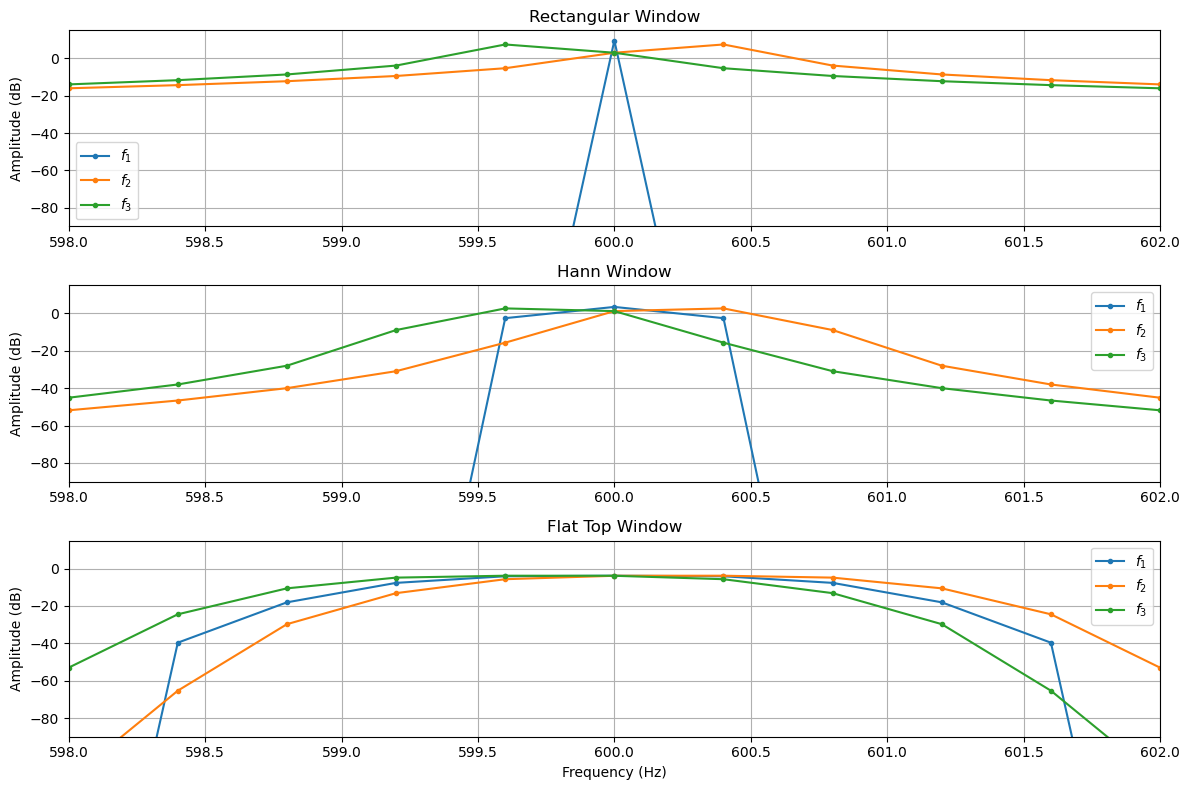

In [ ]:
# Plot DFT spectra
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(freqs, fft2db(X1_rect), 'C0o-', ms=3, label=r'$f_1$')
plt.plot(freqs, fft2db(X2_rect), 'C1o-', ms=3, label=r'$f_2$')
plt.plot(freqs, fft2db(X3_rect), 'C2o-', ms=3, label=r'$f_3$')
plt.xlim(598, 602)
plt.ylim(-90, 15)
plt.title('Rectangular Window')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(freqs, fft2db(X1_hann), 'C0o-', ms=3, label=r'$f_1$')
plt.plot(freqs, fft2db(X2_hann), 'C1o-', ms=3, label=r'$f_2$')
plt.plot(freqs, fft2db(X3_hann), 'C2o-', ms=3, label=r'$f_3$')
plt.xlim(598, 602)
plt.ylim(-90, 15)
plt.title('Hann Window')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(freqs, fft2db(X1_flattop), 'C0o-', ms=3, label=r'$f_1$')
plt.plot(freqs, fft2db(X2_flattop), 'C1o-', ms=3, label=r'$f_2$')
plt.plot(freqs, fft2db(X3_flattop), 'C2o-', ms=3, label=r'$f_3$')
plt.xlim(598, 602)
plt.ylim(-90, 15)
plt.title('Flat Top Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid(True)

plt.tight_layout()
#plt.savefig('dft_spectra.png', dpi=300)
plt.show()


In [ ]:
# DTFT function for windows
def winDTFTdB(w):
    N = w.size
    N_zp = 100 * N  # Zero-padding
    W = np.zeros(N_zp)
    W[0:N] = w
    W_fft = np.abs(fftshift(fft(W)))
    W_fft /= np.max(W_fft)  # Normalize to mainlobe maximum
    
    W_fft = 20 * np.log10(W_fft + 1e-12)  # Avoid log(0)
    Omega = 2 * np.pi / N_zp * np.arange(N_zp) - np.pi

    return Omega, W_fft


In [22]:
# Compute window DTFTs
Omega_rect, W_rect_dB = winDTFTdB(w_rect)
Omega_hann, W_hann_dB = winDTFTdB(w_hann)
Omega_flattop, W_flattop_dB = winDTFTdB(w_flattop)


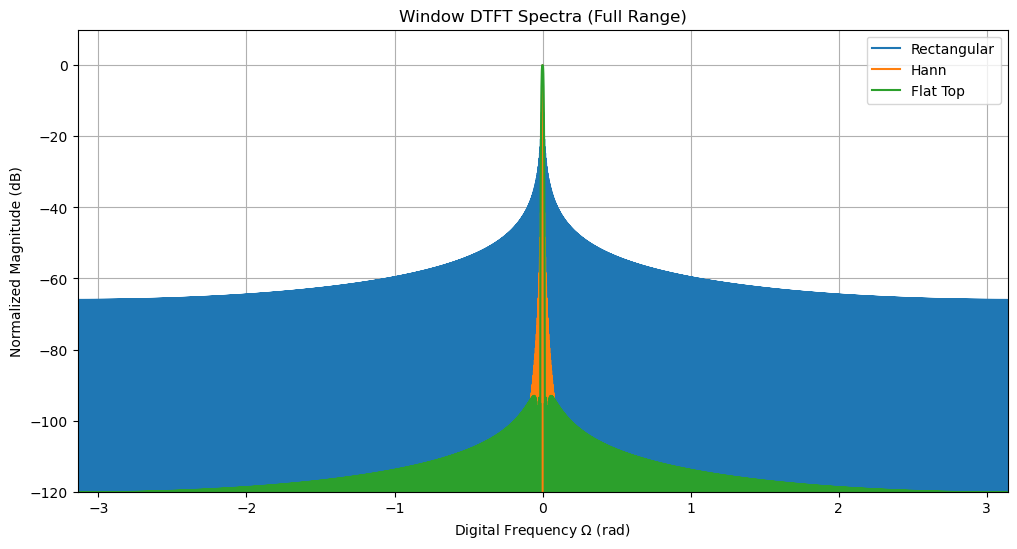

In [ ]:
# Plot DTFT spectra
plt.figure(figsize=(12, 6))
plt.plot(Omega_rect, W_rect_dB, label='Rectangular')
plt.plot(Omega_hann, W_hann_dB, label='Hann')
plt.plot(Omega_flattop, W_flattop_dB, label='Flat Top')
plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)
plt.xlabel(r'Digital Frequency $\Omega$ (rad)')
plt.ylabel('Normalized Magnitude (dB)')
plt.title('Window DTFT Spectra (Full Range)')
plt.legend()
plt.grid(True)
# plt.savefig('dtft_full.png', dpi=300)
plt.show()


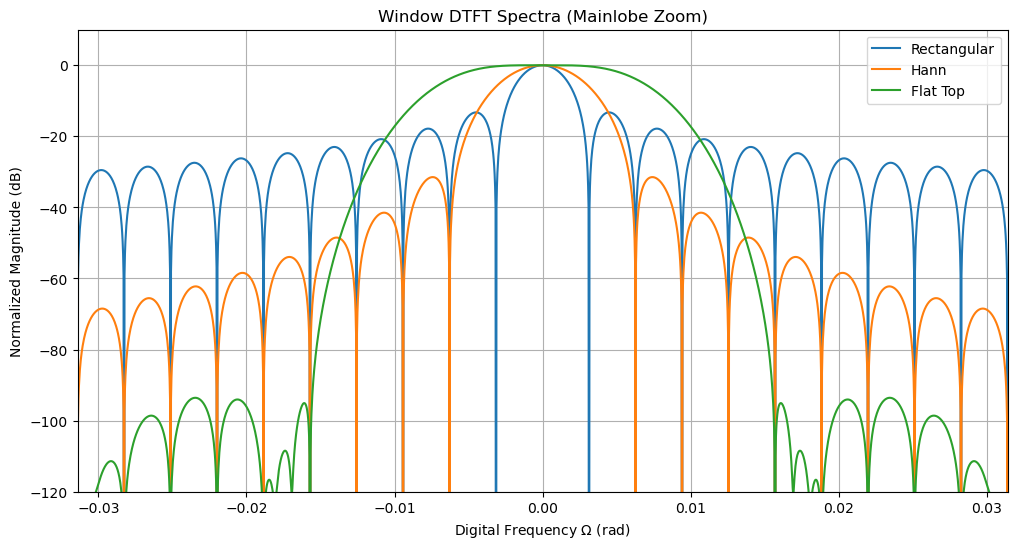

In [25]:
# Zoomed DTFT (mainlobe region)
plt.figure(figsize=(12, 6))
plt.plot(Omega_rect, W_rect_dB, label='Rectangular')
plt.plot(Omega_hann, W_hann_dB, label='Hann')
plt.plot(Omega_flattop, W_flattop_dB, label='Flat Top')
plt.xlim(-np.pi/100, np.pi/100)  # Zoom into mainlobe
plt.ylim(-120, 10)
plt.xlabel(r'Digital Frequency $\Omega$ (rad)')
plt.ylabel('Normalized Magnitude (dB)')
plt.title('Window DTFT Spectra (Mainlobe Zoom)')
plt.legend()
plt.grid(True)
# plt.savefig('dtft_zoomed.png', dpi=300)
plt.show()
